# Exploración de Datos FIFA22

# 1. Introducción

Este análisis tiene como objetivo explorar el conjunto de datos de FIFA22, 
centrándose en variables clave como el potencial, salario, reputación, valor de mercado y estatura de los jugadores.

# 2. Carga y exploración inicial de datos


In [1]:
# 2.1 Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

/home/julihocc/tec3d.worktrees/v1.0.0/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 2.2 Carga del dataset

current_folder = os.getcwd()

pickle_dir = os.path.join(current_folder, "data")
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)
pickle_file = os.path.join(pickle_dir, "players_22.pkl")

if os.path.exists(pickle_file):
    print(f"The pickle file already exists at: {pickle_file}")
else:
    os.environ["KAGGLEHUB_CACHE"] = current_folder + "/kagglehub_cache"
    path = kagglehub.dataset_download(
        "stefanoleone992/fifa-22-complete-player-dataset"
    )
    print("Downloaded path: ", path)
    output_file = os.path.join(path, "players_22.csv")
    pd.read_csv(output_file).to_pickle(pickle_file)

df = pd.read_pickle(pickle_file)

The pickle file already exists at: /home/julihocc/tec3d.worktrees/v1.0.0/data/players_22.pkl


In [3]:
# 2.3 Exploración inicial
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [5]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [6]:
# 2.4 Identificación de valores nulos
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

# 3. Análisis exploratorio (EDA)

## 3.1 Distribución de características físicas y económicas

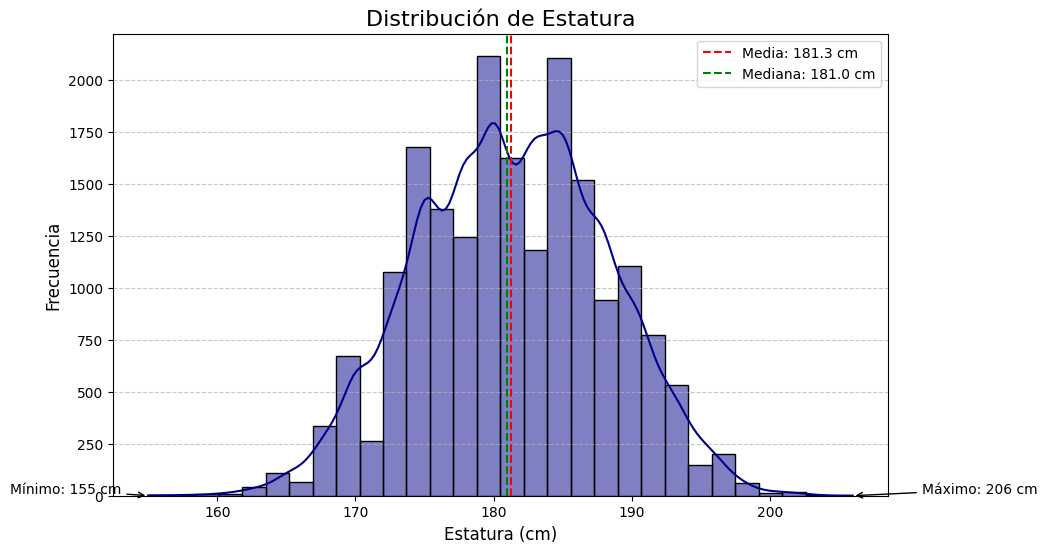

In [7]:
# Calculate key statistics
mean_height = df["height_cm"].mean()
median_height = df["height_cm"].median()
max_height = df["height_cm"].max()
min_height = df["height_cm"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["height_cm"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="darkblue")

# Add vertical lines for mean and median
plt.axvline(mean_height, color="red", linestyle="--", label=f"Media: {mean_height:.1f} cm")
plt.axvline(median_height, color="green", linestyle="--", label=f"Mediana: {median_height:.1f} cm")

# Annotate max and min values
plt.annotate(f"Máximo: {max_height} cm", xy=(max_height, 0), xytext=(max_height + 5, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.annotate(f"Mínimo: {min_height} cm", xy=(min_height, 0), xytext=(min_height - 10, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))

# Add labels, title, grid, and legend
plt.title("Distribución de Estatura", fontsize=16)
plt.xlabel("Estatura (cm)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

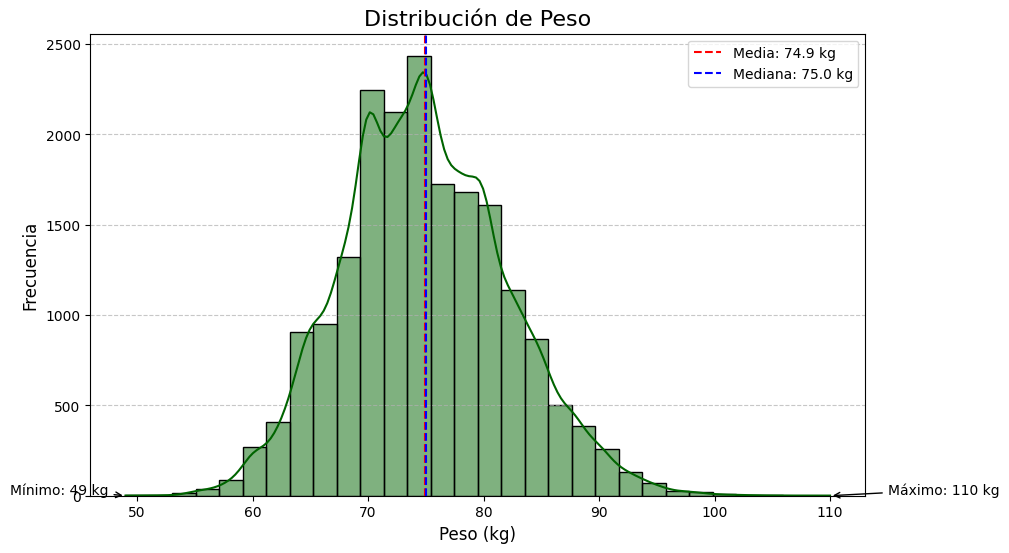

In [8]:
# Calculate key statistics
mean_weight = df["weight_kg"].mean()
median_weight = df["weight_kg"].median()
max_weight = df["weight_kg"].max()
min_weight = df["weight_kg"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["weight_kg"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="darkgreen")

# Add vertical lines for mean and median
plt.axvline(mean_weight, color="red", linestyle="--", label=f"Media: {mean_weight:.1f} kg")
plt.axvline(median_weight, color="blue", linestyle="--", label=f"Mediana: {median_weight:.1f} kg")

# Annotate max and min values
plt.annotate(f"Máximo: {max_weight} kg", xy=(max_weight, 0), xytext=(max_weight + 5, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.annotate(f"Mínimo: {min_weight} kg", xy=(min_weight, 0), xytext=(min_weight - 10, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))

# Add labels, title, grid, and legend
plt.title("Distribución de Peso", fontsize=16)
plt.xlabel("Peso (kg)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

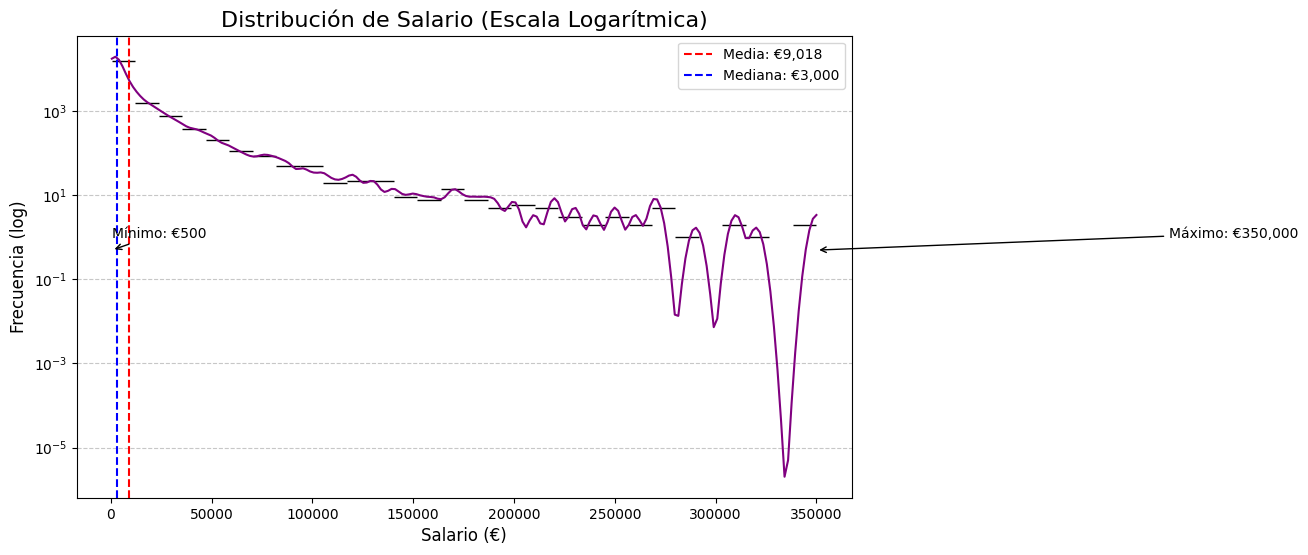

In [9]:
# Calculate key statistics
mean_salary = df["wage_eur"].mean()
median_salary = df["wage_eur"].median()
max_salary = df["wage_eur"].max()
min_salary = df["wage_eur"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["wage_eur"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="purple", log_scale=(False, True))

# Add vertical lines for mean and median
plt.axvline(mean_salary, color="red", linestyle="--", label=f"Media: €{mean_salary:,.0f}")
plt.axvline(median_salary, color="blue", linestyle="--", label=f"Mediana: €{median_salary:,.0f}")

# Annotate max and min values
plt.annotate(f"Máximo: €{max_salary:,.0f}", xy=(max_salary, 0.5), xytext=(max_salary * 1.5, 1),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10)
plt.annotate(f"Mínimo: €{min_salary:,.0f}", xy=(min_salary, 0.5), xytext=(min_salary * 1.5, 1),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10)

# Add labels, title, grid, and legend
plt.title("Distribución de Salario (Escala Logarítmica)", fontsize=16)
plt.xlabel("Salario (€)", fontsize=12)
plt.ylabel("Frecuencia (log)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

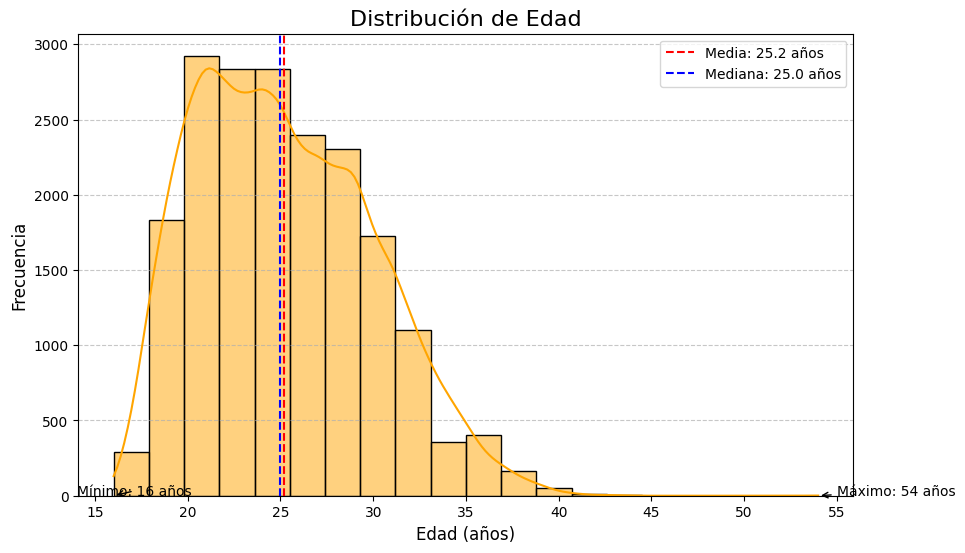

In [10]:
# Calculate key statistics
mean_age = df["age"].mean()
median_age = df["age"].median()
max_age = df["age"].max()
min_age = df["age"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], kde=True, bins=20, alpha=0.5, edgecolor="black", color="orange")

# Add vertical lines for mean and median
plt.axvline(mean_age, color="red", linestyle="--", label=f"Media: {mean_age:.1f} años")
plt.axvline(median_age, color="blue", linestyle="--", label=f"Mediana: {median_age:.1f} años")

# Annotate max and min values
plt.annotate(f"Máximo: {max_age} años", xy=(max_age, 0), xytext=(max_age + 1, 5),
             arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.annotate(f"Mínimo: {min_age} años", xy=(min_age, 0), xytext=(min_age - 2, 5),
             arrowprops=dict(facecolor="black", arrowstyle="->"))

# Add labels, title, grid, and legend
plt.title("Distribución de Edad", fontsize=16)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

## 3.2 Dominancia del pie

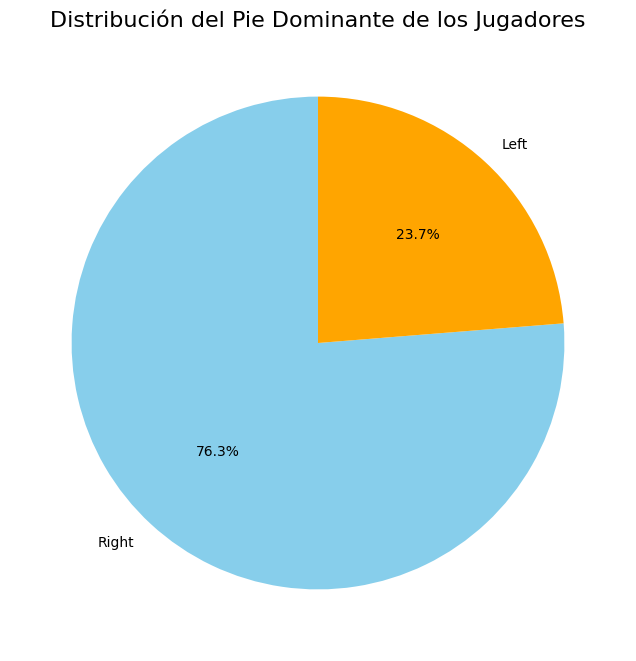

In [11]:
# Calculate the counts for each category
foot_counts = df["preferred_foot"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(foot_counts, labels=foot_counts.index, autopct="%1.1f%%", startangle=90, colors=["skyblue", "orange"])
plt.title("Distribución del Pie Dominante de los Jugadores", fontsize=16)
plt.show()

## 3.3 Representación geográfica

/tmp/ipykernel_60493/2503400133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


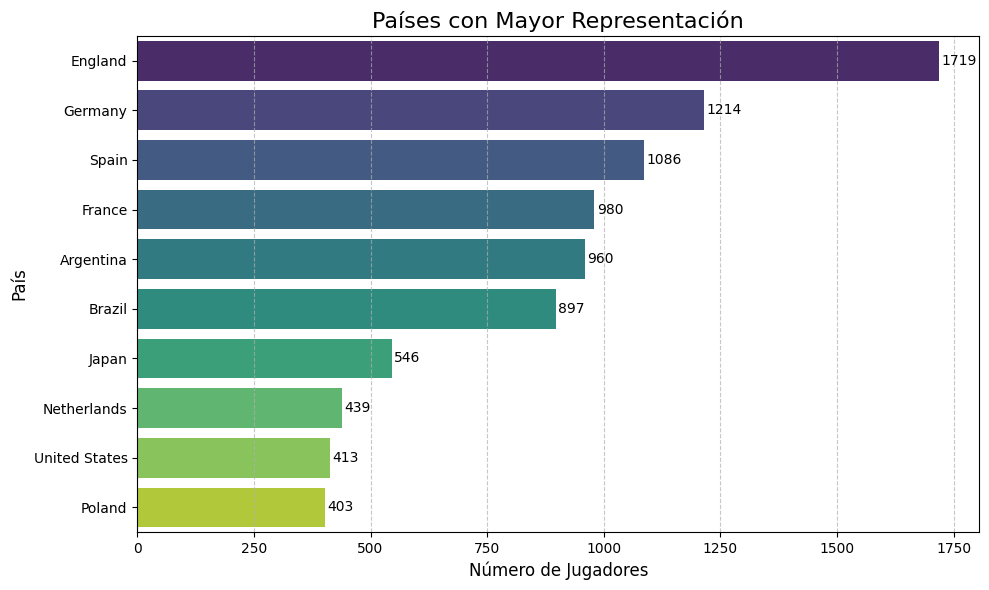

In [12]:
# Calculate the top 10 countries
top_countries = df["nationality_name"].value_counts().head(10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")

# Add labels, title, and grid
plt.title("Países con Mayor Representación", fontsize=16)
plt.xlabel("Número de Jugadores", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate the bars with values
for index, value in enumerate(top_countries.values):
    plt.text(value + 5, index, str(value), va="center", fontsize=10)

plt.tight_layout()
plt.show()

## 3.4 Posiciones de los jugadores

In [13]:
# Comprehensive mapping for all positions
position_mapping = {
    "SUB": "Suplente",
    "RES": "Reserva",
    "GK": "Portero",
    "RB": "Lateral Derecho",
    "LB": "Lateral Izquierdo",
    "CB": "Defensa Central",
    "LCB": "Defensa Central Izquierdo",
    "RCB": "Defensa Central Derecho",
    "CM": "Centrocampista",
    "LCM": "Centrocampista Izquierdo",
    "RCM": "Centrocampista Derecho",
    "CDM": "Mediocentro Defensivo",
    "LDM": "Mediocentro Defensivo Izquierdo",
    "RDM": "Mediocentro Defensivo Derecho",
    "CAM": "Mediocentro Ofensivo",
    "LAM": "Mediocentro Ofensivo Izquierdo",
    "RAM": "Mediocentro Ofensivo Derecho",
    "RM": "Extremo Derecho",
    "LM": "Extremo Izquierdo",
    "RW": "Delantero Derecho",
    "LW": "Delantero Izquierdo",
    "ST": "Delantero Centro",
    "CF": "Delantero",
    "RS": "Delantero Derecho",
    "LS": "Delantero Izquierdo",
    "RWB": "Carrilero Derecho",
    "LWB": "Carrilero Izquierdo",
    "RF": "Delantero Ofensivo Derecho",
    "LF": "Delantero Ofensivo Izquierdo"
}

# Apply the mapping to the 'club_position' column
df["club_position"] = df["club_position"].replace(position_mapping)

# Verify the changes
print(df["club_position"].value_counts())

club_position
Suplente                           8299
Reserva                            3168
Portero                             701
Defensa Central Derecho             701
Defensa Central Izquierdo           701
Lateral Izquierdo                   515
Lateral Derecho                     515
Delantero Centro                    476
Centrocampista Derecho              470
Centrocampista Izquierdo            470
Extremo Derecho                     410
Extremo Izquierdo                   410
Delantero Derecho                   408
Delantero Izquierdo                 408
Mediocentro Ofensivo                292
Mediocentro Defensivo Derecho       223
Mediocentro Defensivo Izquierdo     223
Defensa Central                     186
Mediocentro Defensivo               168
Carrilero Izquierdo                 116
Carrilero Derecho                   116
Centrocampista                       83
Delantero Ofensivo Derecho           35
Delantero Ofensivo Izquierdo         35
Mediocentro Ofensivo Izqui

/tmp/ipykernel_60493/1146831956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.values, y=position_counts.index, palette="coolwarm")


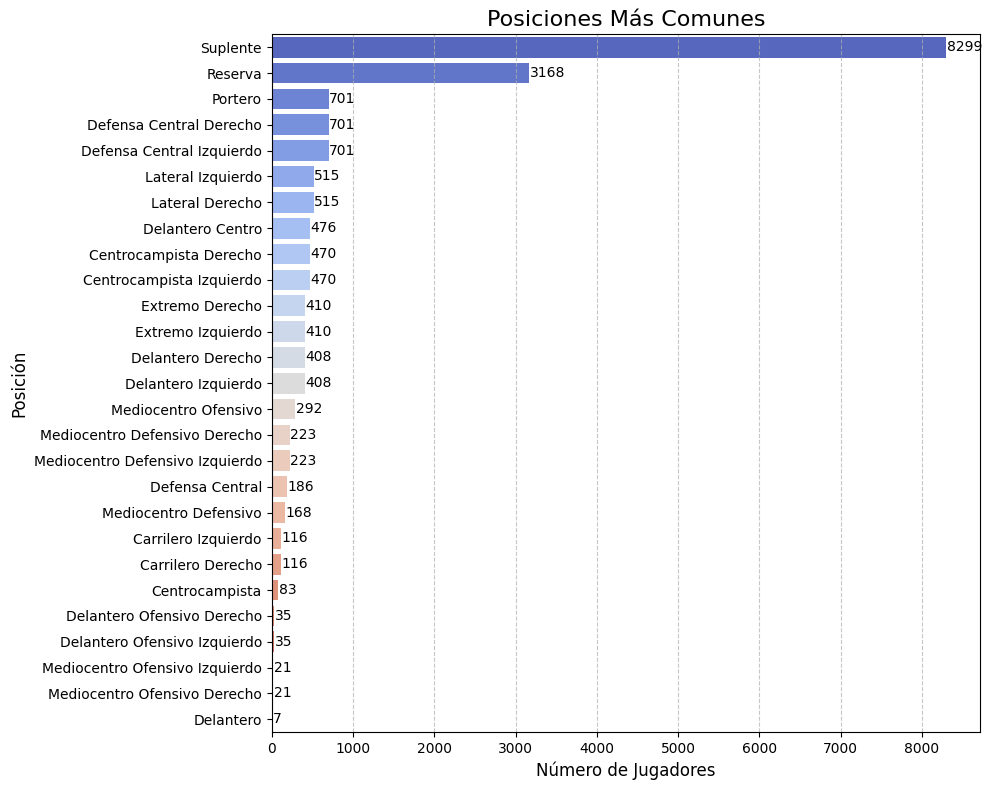

In [14]:
# Calculate the counts for each position
position_counts = df["club_position"].value_counts()

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=position_counts.values, y=position_counts.index, palette="coolwarm")

# Add labels, title, and grid
plt.title("Posiciones Más Comunes", fontsize=16)
plt.xlabel("Número de Jugadores", fontsize=12)
plt.ylabel("Posición", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate the bars with values
for index, value in enumerate(position_counts.values):
    plt.text(value + 5, index, str(value), va="center", fontsize=10)

plt.tight_layout()
plt.show()

# 4. Relaciones entre variables clave

## 4.1 Potencial vs Salario

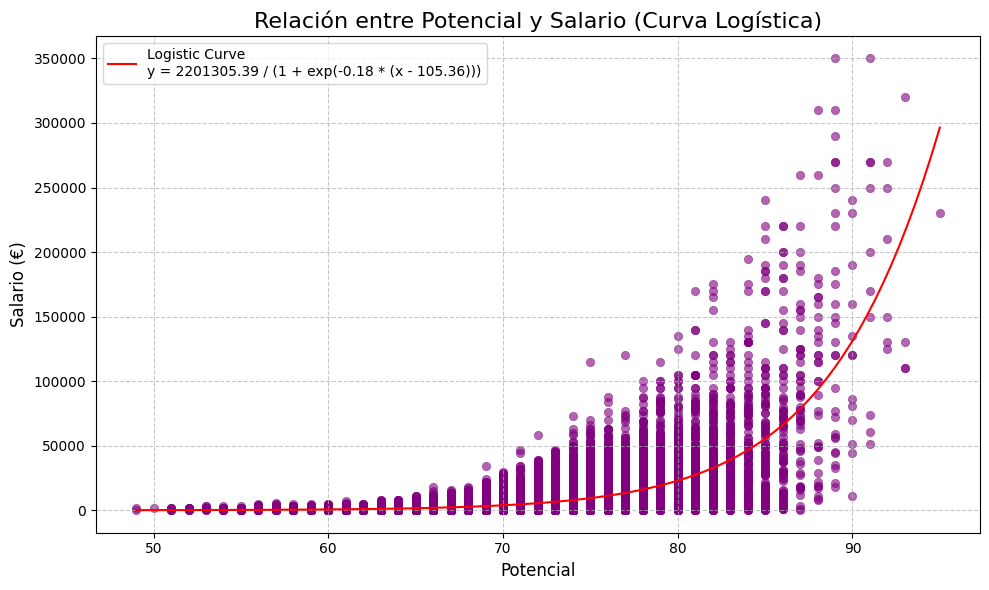

Fitted Parameters:
L (Maximum Value): 2201305.39
k (Growth Rate): 0.18
x0 (Midpoint): 105.36


In [15]:
# Logistic curve fitting for Potential vs Salary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Define the logistic function
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Filter out rows where potential or wage_eur is NaN or <= 0
df_filtered = df[df["potential"] > 0]
df_filtered = df_filtered.dropna(subset=["potential", "wage_eur"])

# Prepare data for curve fitting
x_data = df_filtered["potential"]
y_data = df_filtered["wage_eur"]

# Fit the logistic curve
initial_guess = [y_data.max(), 0.1, x_data.mean()]  # Initial guesses for L, k, and x0
params, _ = curve_fit(logistic_func, x_data, y_data, p0=initial_guess, maxfev=10000)

# Generate predictions for the logistic curve
x_values = np.linspace(x_data.min(), x_data.max(), 100)
y_values = logistic_func(x_values, *params)

# Plot the scatter plot and logistic curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x="potential", y="wage_eur", data=df_filtered, alpha=0.6, color="purple", edgecolor=None)
plt.plot(x_values, y_values, color="red", label=f"Logistic Curve\ny = {params[0]:.2f} / (1 + exp(-{params[1]:.2f} * (x - {params[2]:.2f})))")
plt.title("Relación entre Potencial y Salario (Curva Logística)", fontsize=16)
plt.xlabel("Potencial", fontsize=12)
plt.ylabel("Salario (€)", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters:\nL (Maximum Value): {params[0]:.2f}\nk (Growth Rate): {params[1]:.2f}\nx0 (Midpoint): {params[2]:.2f}")

## 4.2 Reputación vs Valor de mercado

/tmp/ipykernel_60493/3846184065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


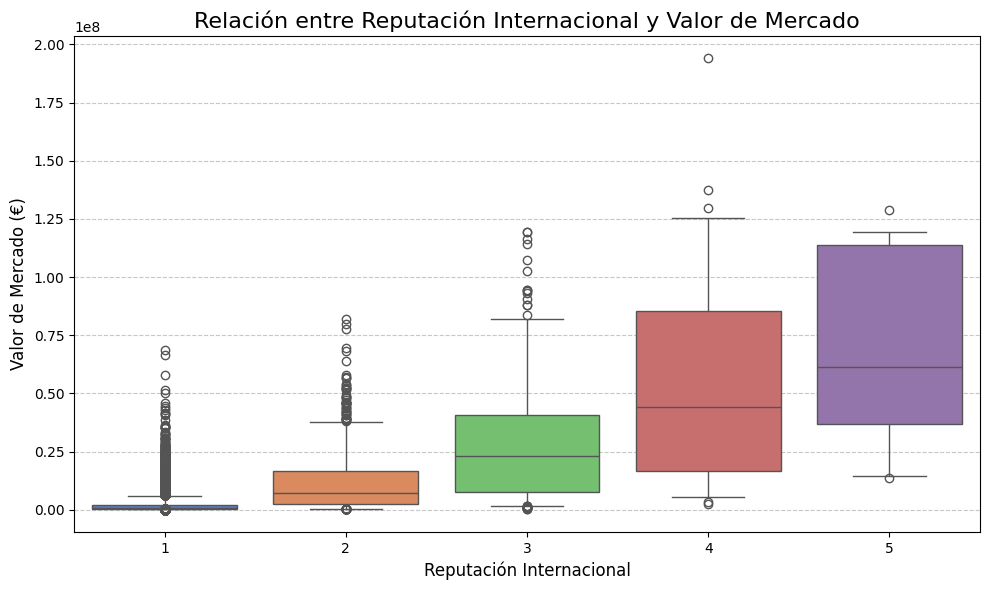

In [16]:
# Boxplot for International Reputation vs Market Value
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    x="international_reputation", 
    y="value_eur", 
    data=df, 
    palette="muted", 
    whis=[5, 95]  # Show whiskers at 5th and 95th percentiles
)

# Add labels, title, and grid
plt.title("Relación entre Reputación Internacional y Valor de Mercado", fontsize=16)
plt.xlabel("Reputación Internacional", fontsize=12)
plt.ylabel("Valor de Mercado (€)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## 4.3 Reputación vs Salario

/tmp/ipykernel_60493/2545433775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


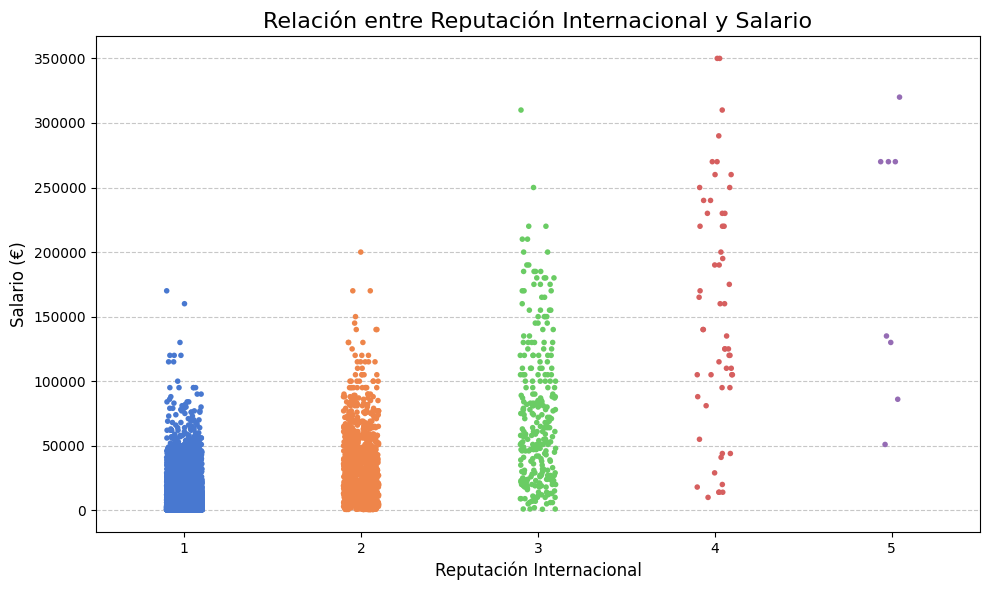

In [17]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    x="international_reputation", 
    y="wage_eur", 
    data=df, 
    palette="muted", 
    jitter=True,  # Agrega un poco de dispersión para evitar superposición
    size=4
)
plt.title("Relación entre Reputación Internacional y Salario", fontsize=16)
plt.xlabel("Reputación Internacional", fontsize=12)
plt.ylabel("Salario (€)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 4.4 Estatura vs Potencial

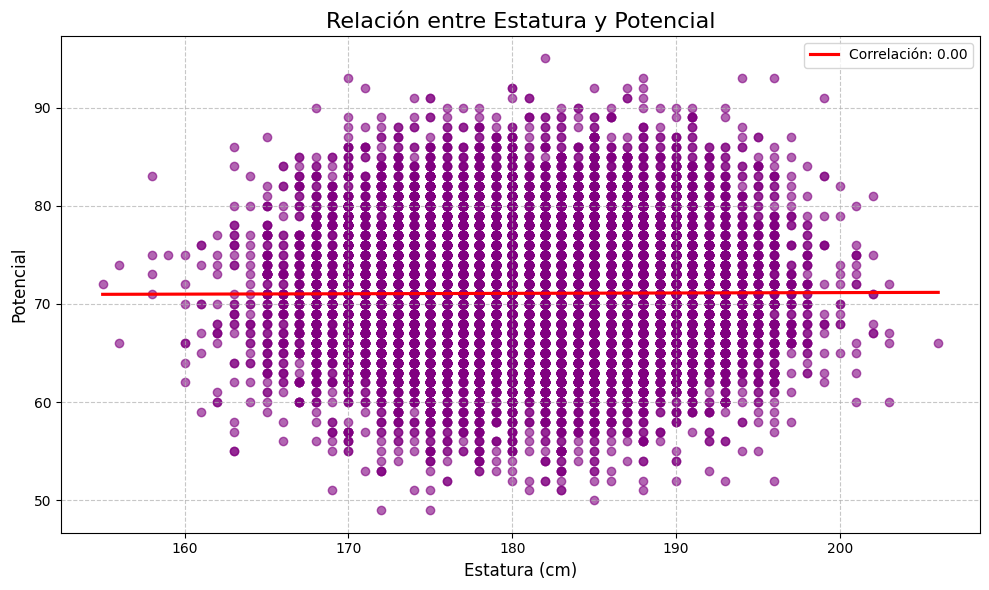

Correlación de Pearson: 0.00 (p-value: 5.41e-01)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calcular la correlación
correlation, p_value = pearsonr(df["height_cm"], df["potential"])

# Crear el scatterplot mejorado con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x="height_cm", 
    y="potential", 
    data=df, 
    scatter_kws={"alpha": 0.6, "color": "purple"},  # Personalizar puntos
    line_kws={"color": "red", "label": f"Correlación: {correlation:.2f}"},  # Personalizar línea
    ci=None  # No mostrar intervalo de confianza
)

# Añadir título y etiquetas
plt.title("Relación entre Estatura y Potencial", fontsize=16)
plt.xlabel("Estatura (cm)", fontsize=12)
plt.ylabel("Potencial", fontsize=12)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir la correlación
print(f"Correlación de Pearson: {correlation:.2f} (p-value: {p_value:.2e})")

# 5. Jugadores destacados

## 5.1 Jugadores mejor remunerados

In [19]:
df[["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False).head(10)

,short_name,wage_eur
4,K. De Bruyne,350000.0
11,K. Benzema,350000.0
0,L. Messi,320000.0
24,T. Kroos,310000.0
14,Casemiro,310000.0
27,R. Sterling,290000.0
17,M. Salah,270000.0
16,S. Mané,270000.0
1,R. Lewandowski,270000.0
2,Cristiano Ronaldo,270000.0


## 5.2 Jugadores con mayor potencial

In [20]:
df[["short_name", "potential"]].sort_values(by="potential", ascending=False).head(10)

,short_name,potential
6,K. Mbappé,95
29,E. Haaland,93
21,G. Donnarumma,93
0,L. Messi,93
5,J. Oblak,93
1,R. Lewandowski,92
139,P. Foden,92
8,M. ter Stegen,92
44,T. Alexander-Arnold,92
43,F. de Jong,92


## 5.3 Jugadores con mejor valoración general

In [21]:
df[["short_name", "overall"]].sort_values(by="overall", ascending=False).head(10)

,short_name,overall
0,L. Messi,93
1,R. Lewandowski,92
2,Cristiano Ronaldo,91
3,Neymar Jr,91
4,K. De Bruyne,91
5,J. Oblak,91
6,K. Mbappé,91
10,N. Kanté,90
8,M. ter Stegen,90
7,M. Neuer,90


# 6. Conclusiones

- Se identificaron patrones interesantes en las relaciones entre potencial, salario y reputación.
- La mayoría de los jugadores tienden a ser diestros.
- Determinados países dominan la representación de jugadores.
- Hay correlaciones positivas moderadas entre reputación y valor de mercado.
- Se pueden proponer futuros estudios como predicción del valor de mercado a partir de atributos físicos y técnicos.